In [159]:
import pandas as pd
import requests

In [160]:
response_key = requests.get('https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,STATE,NAICS2017,NAICS2017_LABEL,YIBSZFI,YIBSZFI_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,EMP,EMP_F,PAYANN,PAYANN_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=state:*&key=8a3df61e848ed09da46d7c9e86eb70fb4c3ec168')

In [161]:
response_us = requests.get('https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,STATE,NAICS2017,NAICS2017_LABEL,YIBSZFI,YIBSZFI_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,EMP,EMP_F,PAYANN,PAYANN_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key=8a3df61e848ed09da46d7c9e86eb70fb4c3ec168')

In [162]:
data = response_key.text

In [163]:
df = pd.read_json(data)

In [164]:
df = df.rename(columns=df.iloc[0]).drop(df.index[0])

In [165]:
df = df.astype({'PAYANN': float, 'EMP': float})

In [166]:
df_filtered = df[['NAME', 'PAYANN', 'PAYANN_F', 'RACE_GROUP_LABEL', 'NAICS2017_LABEL', 'YIBSZFI_LABEL', 'SEX', 'VET_GROUP', 'ETH_GROUP', 'EMPSZFI','EMP','EMP_F']]
df_filtered = df_filtered[df_filtered['PAYANN_F'].isna()==True]
df_filtered = df_filtered[df_filtered['EMP_F'].isna()==True]
df_filtered = df_filtered[df_filtered['EMPSZFI'] == '001']
df_filtered_b = df_filtered[df_filtered['RACE_GROUP_LABEL'] == 'Black or African American']
df_filtered_b = df_filtered_b[df_filtered_b['NAICS2017_LABEL'] == 'Total for all sectors']
df_filtered_b = df_filtered_b[df_filtered_b['YIBSZFI_LABEL'] == 'All firms']
df_filtered_b = df_filtered_b[df_filtered_b['SEX'] == '001']
df_filtered_b = df_filtered_b[df_filtered_b['VET_GROUP'] == '001']
df_filtered_b = df_filtered_b[df_filtered_b['ETH_GROUP'] == '001']

In [167]:
df_filtered_b1 = df_filtered[df_filtered['RACE_GROUP_LABEL'] == 'Total']
df_filtered_b1 = df_filtered_b1[df_filtered_b1['NAICS2017_LABEL'] == 'Total for all sectors']
df_filtered_b1 = df_filtered_b1[df_filtered_b1['YIBSZFI_LABEL'] == 'All firms']
df_filtered_b1 = df_filtered_b1[df_filtered_b1['SEX'] == '001']
df_filtered_b1 = df_filtered_b1[df_filtered_b1['VET_GROUP'] == '001']
df_filtered_b1 = df_filtered_b1[df_filtered_b1['ETH_GROUP'] == '001']

In [168]:
df_b = df_filtered_b[['NAME', 'PAYANN', 'EMP']]
df_b1 = df_filtered_b1[['NAME', 'PAYANN', 'EMP']]

payroll_employee = df_b['PAYANN']/df_b['EMP']

payroll_emp = payroll_employee.tolist()

df_b.insert(3, "Pay per Employee", payroll_employee)

payroll_employee = df_b1['PAYANN']/df_b1['EMP']

payroll_emp = payroll_employee.tolist()

df_b1.insert(3, "Pay per Employee", payroll_employee)

df_b_merged = pd.merge(df_b, df_b1, how = 'inner', on = 'NAME', suffixes = ('_black', '_total'))


<AxesSubplot:xlabel='NAME'>

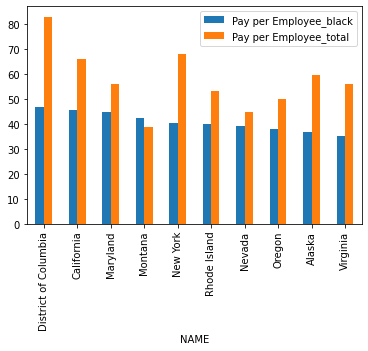

In [152]:
payann = df_b_merged[['NAME', 'Pay per Employee_black', 'Pay per Employee_total']]
payann_tops = payann.sort_values(by = 'Pay per Employee_black', ascending = False)
best_payann = payann_tops.iloc[0:10]

best_payann.plot.bar('NAME')

Text(0.5, 0, 'State')

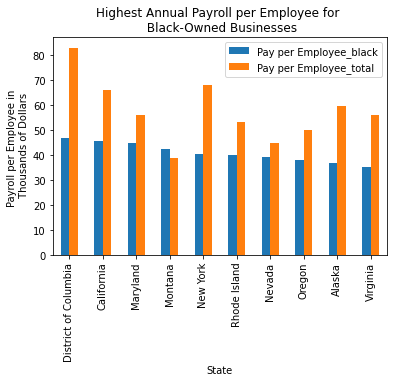

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = best_payann.plot('NAME', title = 'Highest Annual Payroll per Employee for \n Black-Owned Businesses', kind = 'bar')
ax.set_ylabel('Payroll per Employee in \n Thousands of Dollars')
ax.set_xlabel('State')

In [169]:
df_filtered_V = df_filtered[df_filtered['RACE_GROUP_LABEL'] == 'Total']
df_filtered_V = df_filtered_V[df_filtered_V['NAICS2017_LABEL'] == 'Total for all sectors']
df_filtered_V = df_filtered_V[df_filtered_V['YIBSZFI_LABEL'] == 'All firms']
df_filtered_V = df_filtered_V[df_filtered_V['SEX'] == '001']
df_filtered_V = df_filtered_V[df_filtered_V['VET_GROUP'] == '002']
df_filtered_V = df_filtered_V[df_filtered_V['ETH_GROUP'] == '001']

In [170]:
df_filtered_V1 = df_filtered[df_filtered['RACE_GROUP_LABEL'] == 'Total']
df_filtered_V1 = df_filtered_V1[df_filtered_V1['NAICS2017_LABEL'] == 'Total for all sectors']
df_filtered_V1 = df_filtered_V1[df_filtered_V1['YIBSZFI_LABEL'] == 'All firms']
df_filtered_V1 = df_filtered_V1[df_filtered_V1['SEX'] == '001']
df_filtered_V1 = df_filtered_V1[df_filtered_V1['VET_GROUP'] == '001']
df_filtered_V1 = df_filtered_V1[df_filtered_V1['ETH_GROUP'] == '001']

In [172]:
df_v = df_filtered_V[['NAME', 'PAYANN', 'EMP']]
df_v1 = df_filtered_V1[['NAME', 'PAYANN', 'EMP']]

payroll_employee = df_v['PAYANN']/df_v['EMP']

payroll_emp = payroll_employee.tolist()

df_v.insert(3, "Pay per Employee", payroll_employee)

payroll_employee = df_v1['PAYANN']/df_v1['EMP']

payroll_emp = payroll_employee.tolist()

df_v1.insert(3, "Pay per Employee", payroll_employee)

df_v_merged = pd.merge(df_v, df_v1, how = 'inner', on = 'NAME', suffixes = ('_veteran', '_total'))

Text(0.5, 0, 'State')

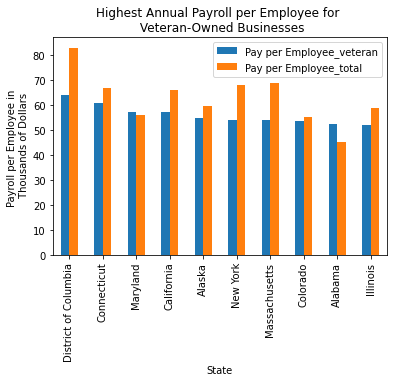

In [175]:
payannv = df_v_merged[['NAME', 'Pay per Employee_veteran', 'Pay per Employee_total']]
payannv_tops = payannv.sort_values(by = 'Pay per Employee_veteran', ascending = False)
best_payannv = payannv_tops.iloc[0:10]

ax = best_payannv.plot('NAME', title = 'Highest Annual Payroll per Employee for \n Veteran-Owned Businesses', kind = 'bar')
ax.set_ylabel('Payroll per Employee in \n Thousands of Dollars')
ax.set_xlabel('State')

In [176]:
data_us = response_us.text

In [177]:
df_us = pd.read_json(data_us)

In [178]:
df_us = df_us.rename(columns=df_us.iloc[0]).drop(df_us.index[0])
df_us = df_us.astype({'PAYANN': float, 'EMP': float})

In [179]:
df_us_f = df_us[df_us['PAYANN_F'].isna() == True]
df_us_f = df_us_f[df_us_f['EMP_F'].isna()==True]
df_us_f = df_us_f[df_us_f['EMPSZFI'] == '001']
df_us_fb = df_us_f[df_us_f['RACE_GROUP_LABEL'] == 'Black or African American']
df_us_fb = df_us_fb[df_us_fb['NAICS2017_LABEL'] != 'Total for all sectors']
df_us_fb = df_us_fb[df_us_fb['YIBSZFI_LABEL'] == 'All firms']
df_us_fb = df_us_fb[df_us_fb['SEX'] == '001']
df_us_fb = df_us_fb[df_us_fb['VET_GROUP'] == '001']
df_us_fb = df_us_fb[df_us_fb['ETH_GROUP'] == '001']

In [181]:
df_us_fb1 = df_us_f[df_us_f['RACE_GROUP_LABEL'] == 'Total']
df_us_fb1 = df_us_fb1[df_us_fb1['NAICS2017_LABEL'] != 'Total for all sectors']
df_us_fb1 = df_us_fb1[df_us_fb1['YIBSZFI_LABEL'] == 'All firms']
df_us_fb1 = df_us_fb1[df_us_fb1['SEX'] == '001']
df_us_fb1 = df_us_fb1[df_us_fb1['VET_GROUP'] == '001']
df_us_fb1 = df_us_fb1[df_us_fb1['ETH_GROUP'] == '001']

In [189]:
df_us_b = df_us_fb[['NAICS2017_LABEL', 'PAYANN', 'EMP']]
df_us_b1 = df_us_fb1[['NAICS2017_LABEL', 'PAYANN', 'EMP']]

payroll_employee = df_us_b['PAYANN']/df_us_b['EMP']

payroll_emp = payroll_employee.tolist()

df_us_b.insert(3, "Pay per Employee", payroll_employee)

payroll_employee = df_us_b1['PAYANN']/df_us_b1['EMP']

payroll_emp = payroll_employee.tolist()

df_us_b1.insert(3, "Pay per Employee", payroll_employee)

df_us_b_merged = pd.merge(df_us_b, df_us_b1, how = 'inner', on = 'NAICS2017_LABEL', suffixes = ('_black', '_total'))

In [190]:
df_us_b_merged

,NAICS2017_LABEL,PAYANN_black,EMP_black,Pay per Employee_black,PAYANN_total,EMP_total,Pay per Employee_total
0,Construction,2549131.0,47963.0,53.147864,424172015.0,6754898.0,62.794733
1,Manufacturing,768461.0,18404.0,41.755108,724009247.0,12006094.0,60.303480
2,Wholesale trade,588900.0,11593.0,50.797895,454494182.0,6109303.0,74.393786
3,Retail trade,1315203.0,38747.0,33.943350,462509026.0,15875876.0,29.132819
4,Transportation and warehousing,1632971.0,47818.0,34.149713,263999071.0,5049216.0,52.285161
5,Information,749284.0,10250.0,73.100878,390433031.0,3673165.0,106.293355
6,Finance and insurance,1031060.0,20742.0,49.708803,681850345.0,6643953.0,102.627208
7,Real estate and rental and leasing,454650.0,14173.0,32.078600,116333278.0,2111832.0,55.086426
8,"Professional, scientific, and technical services",5880142.0,100039.0,58.778496,816366134.0,9356647.0,87.249859
9,Management of companies and enterprises,186799.0,3622.0,51.573440,398448215.0,3592035.0,110.925482


Text(0.5, 0, 'Payroll per Employee in \n Thousands fo Dollars')

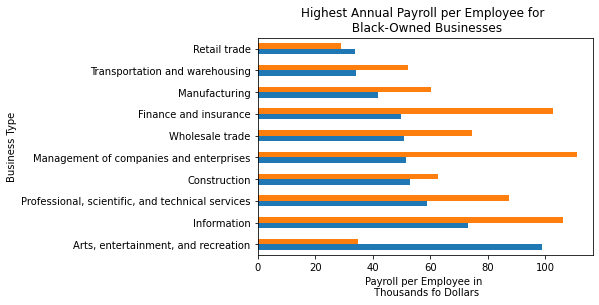

In [209]:
payannb = df_us_b_merged[['NAICS2017_LABEL', 'Pay per Employee_black', 'Pay per Employee_total']]
payannb_tops = payannb.sort_values(by = 'Pay per Employee_black', ascending = False)
best_payannb = payannb_tops.iloc[0:10]

#best_payannv.plot.bar('NAME', legend = None)

ax = best_payannb.plot('NAICS2017_LABEL', title = 'Highest Annual Payroll per Employee for \n Black-Owned Businesses', kind = 'barh', legend = None)
ax.set_ylabel('Business Type')
ax.set_xlabel('Payroll per Employee in \n Thousands fo Dollars')

In [198]:
df_us_fv = df_us_f[df_us_f['RACE_GROUP_LABEL'] == 'Total']
df_us_fv = df_us_fv[df_us_fv['NAICS2017_LABEL'] != 'Total for all sectors']
df_us_fv = df_us_fv[df_us_fv['YIBSZFI_LABEL'] == 'All firms']
df_us_fv = df_us_fv[df_us_fv['SEX'] == '001']
df_us_fv = df_us_fv[df_us_fv['VET_GROUP'] == '002']
df_us_fv = df_us_fv[df_us_fv['ETH_GROUP'] == '001']

In [199]:
df_us_fv1 = df_us_f[df_us_f['RACE_GROUP_LABEL'] == 'Total']
df_us_fv1 = df_us_fv1[df_us_fv1['NAICS2017_LABEL'] != 'Total for all sectors']
df_us_fv1 = df_us_fv1[df_us_fv1['YIBSZFI_LABEL'] == 'All firms']
df_us_fv1 = df_us_fv1[df_us_fv1['SEX'] == '001']
df_us_fv1 = df_us_fv1[df_us_fv1['VET_GROUP'] == '001']
df_us_fv1 = df_us_fv1[df_us_fv1['ETH_GROUP'] == '001']

In [202]:
df_us_v = df_us_fv[['NAICS2017_LABEL', 'PAYANN', 'EMP']]
df_us_v1 = df_us_fv1[['NAICS2017_LABEL', 'PAYANN', 'EMP']]

payroll_employee = df_us_v['PAYANN']/df_us_v['EMP']

payroll_emp = payroll_employee.tolist()

df_us_v.insert(3, "Pay per Employee", payroll_employee)

payroll_employee = df_us_v1['PAYANN']/df_us_v1['EMP']

payroll_emp = payroll_employee.tolist()

df_us_v1.insert(3, "Pay per Employee", payroll_employee)

df_us_v_merged = pd.merge(df_us_v, df_us_v1, how = 'inner', on = 'NAICS2017_LABEL', suffixes = ('_veteran', '_total'))

Text(0.5, 0, 'Payroll per Employee in \n Thousands fo Dollars')

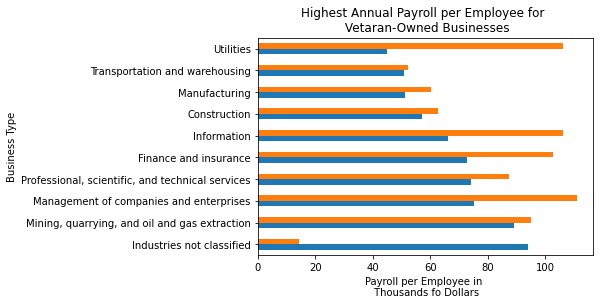

In [210]:
payann_v = df_us_v_merged[['NAICS2017_LABEL', 'Pay per Employee_veteran', 'Pay per Employee_total']]
payann_v_tops = payann_v.sort_values(by = 'Pay per Employee_veteran', ascending = False)
best_payann_v = payann_v_tops.iloc[0:10]

#best_payannv.plot.bar('NAME', legend = None)

ax = best_payann_v.plot('NAICS2017_LABEL', title = 'Highest Annual Payroll per Employee for \n Vetaran-Owned Businesses', kind = 'barh', legend = None)
ax.set_ylabel('Business Type')
ax.set_xlabel('Payroll per Employee in \n Thousands fo Dollars')